# Pandas Exercise: Visualization (Online Retails Purchase)

### Step 1. Import the necessary libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt

In [9]:
online_rt=pd.read_csv('C:\\Users\\Sumeet Chaudhary\\Desktop\\ALABS\\Pandas Case Study\\0. Data\\Online_Retail.csv',encoding='ISO-8859-1')
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [10]:
online_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 22.7+ MB


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [14]:
r=online_rt.groupby(online_rt.Country).Quantity.sum().sort_values(ascending=False)[1:11].reset_index()
r.sort_values('Quantity',inplace=True,ascending=False)
r

,Country,Quantity
0,Netherlands,200128
1,EIRE,142637
2,Germany,117448
3,France,110480
4,Australia,83653
5,Sweden,35637
6,Switzerland,30325
7,Spain,26824
8,Japan,25218
9,Belgium,23152


In [76]:
r.Quantity.shape

(10,)

ValueError: weights should have the same shape as x

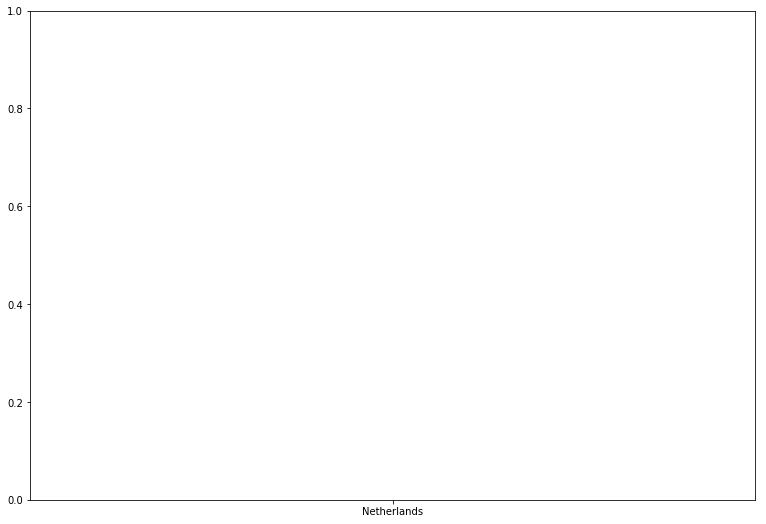

In [15]:
%matplotlib inline
plt.figure(figsize=(13,9))
plt.hist(x=r.Country,weights=r.Quantity)

### Step 5.  Exclude negative Quatity entries

In [41]:
online_rt=online_rt[online_rt.Quantity>0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

In [46]:
new_p=online_rt.groupby(['CustomerID','Country']).sum()

In [53]:
new_p['country'] = new_p.index.get_level_values(1)

In [68]:
new_p.head()

,,Quantity,UnitPrice,country
CustomerID,Country,,,
12346.0,United Kingdom,74215,1.04,United Kingdom
12347.0,Iceland,2458,481.21,Iceland
12348.0,Finland,2341,178.71,Finland
12349.0,Italy,631,605.10,Italy
12350.0,Norway,197,65.30,Norway


In [55]:
#As Top Countries are United Kingdom , Netherlands and EIRE
uk=new_p[new_p.country=='United Kingdom']
neth=new_p[new_p.country=='Netherlands']
eire=new_p[new_p.country=='EIRE']

In [67]:
uk.head()

,,Quantity,UnitPrice,country
CustomerID,Country,,,
12346.0,United Kingdom,74215,1.04,United Kingdom
12747.0,United Kingdom,1275,449.89,United Kingdom
12748.0,United Kingdom,25748,12205.60,United Kingdom
12749.0,United Kingdom,1471,994.99,United Kingdom
12820.0,United Kingdom,722,112.38,United Kingdom


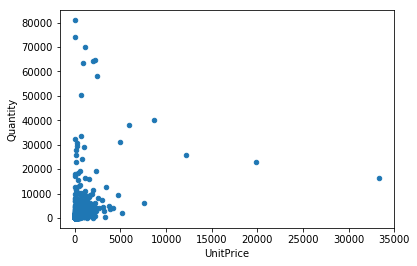

In [60]:
#scatterplot for UK
uk.plot(y='Quantity',x='UnitPrice',kind='scatter')

In [65]:
neth

,,Quantity,UnitPrice,country
CustomerID,Country,,,
12759.0,Netherlands,902,305.47,Netherlands
12775.0,Netherlands,877,256.12,Netherlands
12778.0,Netherlands,825,175.47,Netherlands
12787.0,Netherlands,261,79.96,Netherlands
12789.0,Netherlands,4,91.85,Netherlands
12790.0,Netherlands,166,82.92,Netherlands
12791.0,Netherlands,97,16.85,Netherlands
12802.0,Netherlands,314,63.00,Netherlands
14646.0,Netherlands,197491,5176.09,Netherlands


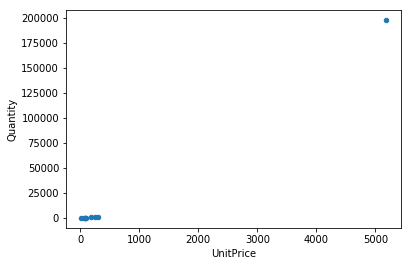

In [61]:
#scatterplot for Netherlands
neth.plot(y='Quantity',x='UnitPrice',kind='scatter')

In [63]:
eire

,,Quantity,UnitPrice,country
CustomerID,Country,,,
14016.0,EIRE,2125,635.88,EIRE
14156.0,EIRE,57885,5357.68,EIRE
14911.0,EIRE,80515,26185.72,EIRE


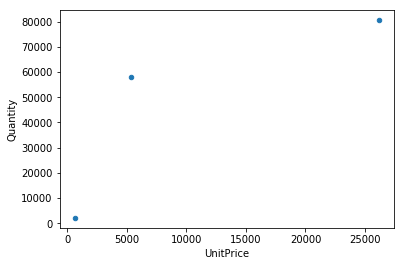

In [64]:
#scatterplot for EIRE
eire.plot(y='Quantity',x='UnitPrice',kind='scatter')

### BONUS: Create your own question and answer it.